# How does FFI affect temporal derivative encoding by simulated 5-HT neuron populations?

Shown in fig. 7.

In [1]:
from common import colors, savefig

In [2]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/home/eharkin/projects/raphegif/raphegif


In [3]:
import warnings
import re
import copy
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np
from tqdm.notebook import trange

from ezephys import pltools

from grr.Simulation import GIFnet_Simulation
from grr.Spiketrain import PSTH

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'publication_figure_style.dms'))
IMG_PATH = os.getenv('IMG_PATH')
BASELINE_LEVELS = np.array([-0.080, -0.060, -0.040, -0.020, 0, 0.020, 0.040, 0.060, 0.080])

In [5]:
DATA_PATH = os.path.join(os.getenv('DATA_PATH'), 'simulations', 'GIF_network')

sim_dict = {'Baseline level': [], 'Rep': [], 'Model': [], 'FFI': []}

for condition in os.listdir(DATA_PATH):
    if not condition in {'deriv_input', 'deriv_input_room_temp_ser_only'}:
        continue
        
    for baseline_level in ['-0.080', '-0.060', '-0.040', '-0.020', '0.000', '0.020', '0.040', '0.060', '0.080']:
        for fname in os.listdir(os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level))):
            if fname.endswith(('hdf5', 'h5')):

                try:
                    this_model = GIFnet_Simulation(
                        os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level), fname), 
                        mode = 'r'
                    ) 

                    sim_dict['Model'].append(this_model)
                    sim_dict['Baseline level'].append(float(baseline_level))
                    sim_dict['Rep'].append(
                        int(re.search(r'rep([0-9]+)', fname).groups()[-1])
                    )
                    
                    if condition == 'deriv_input':
                        sim_dict['FFI'].append(True)
                    elif condition == 'deriv_input_room_temp_ser_only':
                        sim_dict['FFI'].append(False)
                    else:
                        raise RuntimeError('Unrecognized condition {}'.format(condition))
                except IOError:
                    print('Problem with {} baseline {}'.format(baseline_level, fname))
                    continue
            

sim_df = pd.DataFrame(sim_dict).sort_values(['Rep'])
sim_df.reset_index(inplace=True, drop=True)
sim_df.head()

,Baseline level,FFI,Model,Rep
0,-0.08,False,[ser],0
1,-0.02,False,[ser],0
2,0.00,False,[ser],0
3,0.02,False,[ser],0
4,0.04,False,[ser],0


In [6]:
sim_df['Principal PSTH'] = None
sim_df['Principal PSTH'] = sim_df['Principal PSTH'].astype(object)

In [7]:
PSTH_width = 50.

for i in trange(sim_df.shape[0], desc='Model'):
    
    # Get PSTH from 5HT population.
    sim_df.at[i, 'Principal PSTH'] = np.empty((
        sim_df.loc[i, 'Model'].get_no_sweeps(), 
        sim_df.loc[i, 'Model'].get_no_timesteps()
    ))
    for sweep_no in trange(sim_df.loc[i, 'Model'].get_no_sweeps(), desc='5HT sweep', leave=False):
        sim_df.loc[i, 'Principal PSTH'][sweep_no, :] = PSTH(
            sim_df.loc[i, 'Model'].ser_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            sim_df.loc[i, 'Model'].get_no_ser_neurons()
        )

print('\nDone!')

Model:   0%|          | 0/360 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]


Done!


In [9]:
sim_df.head()

,Baseline level,FFI,Model,Rep,Principal PSTH
0,-0.08,False,[ser],0,"[[0.1666666716337204, 0.1666666716337204, 0.16..."
1,-0.02,False,[ser],0,"[[0.1666666716337204, 0.1666666716337204, 0.16..."
2,0.00,False,[ser],0,"[[0.36666667461395264, 0.36666667461395264, 0...."
3,0.02,False,[ser],0,"[[0.36666667461395264, 0.36666667461395264, 0...."
4,0.04,False,[ser],0,"[[1.5999999046325684, 1.5999999046325684, 1.59..."


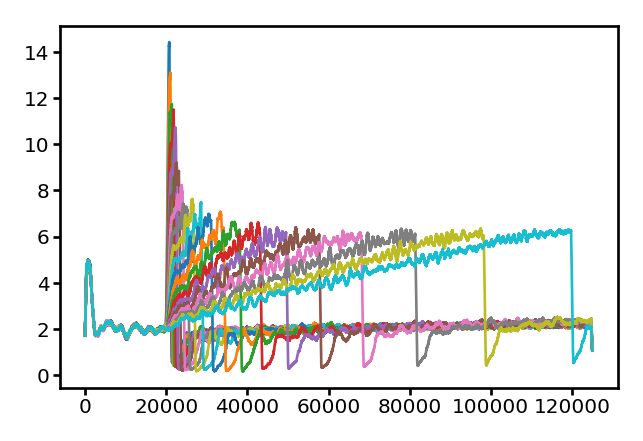

In [8]:
psths = []
for i, row in sim_df.loc[sim_df['Baseline level'] == 0.040, ['Rep', 'Principal PSTH']].iterrows():
    psths.append(row['Principal PSTH'].T)
    
psths = np.array(psths)

plt.plot(psths.mean(axis=0))

In [10]:
def get_psth_max_by_celltype(df):
    max_resp = {key: np.empty((20, len(BASELINE_LEVELS))) for key in ['ser']}
    max_resp_std = {key: np.empty((20, len(BASELINE_LEVELS))) for key in ['ser']}
    for i, baseline in enumerate(BASELINE_LEVELS):

        psths = {key: [] for key in max_resp.keys()}
        for _, row in df.loc[df['Baseline level'] == baseline, ['Rep', 'Principal PSTH']].iterrows():
            psths['ser'].append(row['Principal PSTH'])

        for key in max_resp:
            max_resp[key][:, i] = np.asarray(psths[key])[:, :, 19000:].max(axis=2).mean(axis=0)
            max_resp_std[key][:, i] = np.asarray(psths[key])[:, :, 19000:].max(axis=2).std(axis=0)

    for key in max_resp:
        max_resp[key] = max_resp[key].T
        max_resp_std[key] = max_resp_std[key].T
        
    return {ct: {'mean': max_resp[ct], 'std': max_resp_std[ct]} for ct in ['ser']}

In [11]:
max_resp = {
    '5-HT + FFI': get_psth_max_by_celltype(
        sim_df.query('FFI == True')
    ),
    '5-HT (no FFI)': get_psth_max_by_celltype(
        sim_df.query('FFI == False')
    ),
}

## Cache results

Computing max of each PSTH takes a long time. Save `max_resp` in case the notebook needs to be re-run. When re-running, just run the cells with import/constants (1-4) and then start here.

In [12]:
cache_path = os.path.join(os.getenv('DATA_PATH'), 'processed', 'simulations', 'max_deriv_response_FFI_comparison.dat')
if os.path.exists(cache_path):
    print('Loading.')
    with open(cache_path, 'rb') as f:
        max_resp = pickle.load(f)
        f.close()
else:
    print('Saving.')
    with open(cache_path, 'wb') as f:
        pickle.dump(max_resp, f)
        f.close()

Saving.


## Create figures

In [13]:
deriv_in_pA_s = 100 / (np.logspace(np.log10(100), np.log10(1e4), 20) * 1e-3)

In [19]:
def get_normalizer(x):
    """Get a function that normalizes an array to the max of this function's argument."""
    max_value = np.max(x)
    def normalize(arr):
        return np.asarray(arr) / max_value
    return normalize

def plot_mean_std(mean, std, ax=None, normalize=True, fill_args={}, line_args={}, **pltargs):
    if ax is None:
        ax = plt.gca()
        
    # Set common options.
    fill_args.update(pltargs)
    line_args.update(pltargs)
    
    # Optionally normalize the data using a function 'norm'
    # If normalization is off, 'norm' is identity
    if normalize:
        norm = get_normalizer(mean)
    else:
        norm = lambda x: x
    
    ax.fill_between(
        deriv_in_pA_s,
        norm(mean - std),
        norm(mean + std),
        **fill_args
    )
    ax.plot(
        deriv_in_pA_s,
        norm(mean),
        **line_args
    )

def patch_axes():
    plt.legend()
    plt.ylim(min(0, plt.ylim()[0]))
    plt.xlabel('$dI/dt$ (pA/s)')
    plt.ylabel('Normalized\npeak firing rate')
    pltools.hide_border('tr', trim=True)

Saving svg
Saving png
Done!


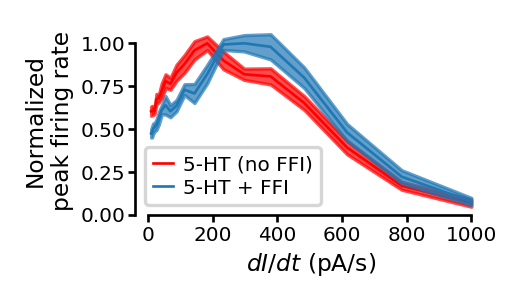

Saving svg
Saving png
Done!


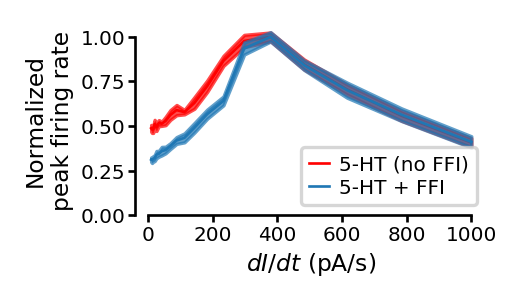

Saving svg
Saving png
Done!


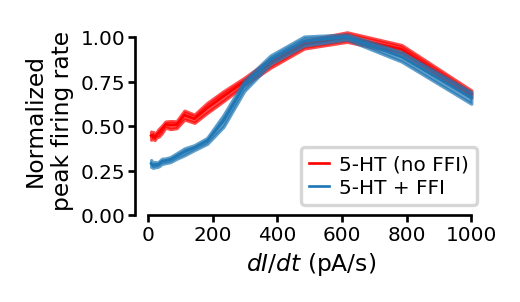

Saving svg
Saving png
Done!


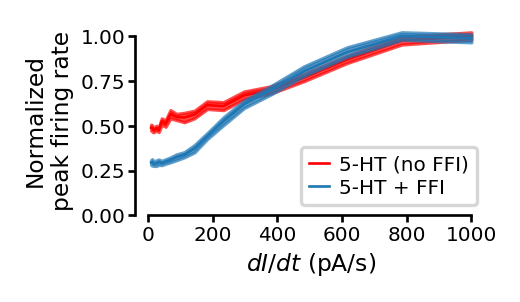

Saving svg
Saving png
Done!


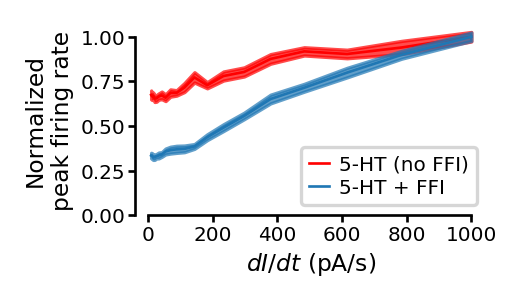

Saving svg
Saving png
Done!


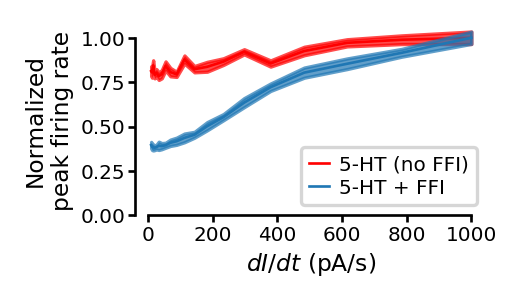

In [24]:
for sweep_ in [2, 3, 4, 5, 6, 8]:
    plt.figure(figsize=(2.2, 1.3))    
    plt.subplot(111)    
    for i, (temperature, color) in enumerate(zip(['5-HT (no FFI)', '5-HT + FFI'], ['red', colors['ser']])):
        plot_mean_std(
            max_resp[temperature]['ser']['mean'][sweep_, :],
            max_resp[temperature]['ser']['std'][sweep_, :],
            color=color,
            zorder=i,
            fill_args={'alpha': 0.7},
            line_args={'label': temperature}
        )
    patch_axes()
    
    plt.tight_layout()
    
    if IMG_PATH is not None:
        savefig(os.path.join(
            IMG_PATH, 
            'deriv_lineplots_FFI_comparison', 'sweep_{}_{}_baseline'.format(
                sweep_,
                int(1e3 * BASELINE_LEVELS[sweep_])
            )
        ))
    
    plt.show()
    plt.gcf().clf()
    plt.close(plt.gcf())